In [1]:
#First we install the yfinance library
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


In [18]:
import yfinance as yf
import pandas as pd

## Question 1 – Extracting Tesla stock data using yfinance

In [3]:
# Create Ticker object for Tesla
tesla = yf.Ticker('TSLA')

# Download historical data for the last 3 months
tesla_data = tesla.history(period='3mo')

# Show the first 5 records of the DataFrame
print("Tesla historical data")
print(tesla_data.head())

Tesla historical data
                                 Open        High         Low       Close  \
Date                                                                        
2024-04-17 00:00:00-04:00  157.639999  158.330002  153.779999  155.449997   
2024-04-18 00:00:00-04:00  151.250000  152.199997  148.699997  149.929993   
2024-04-19 00:00:00-04:00  148.970001  150.940002  146.220001  147.050003   
2024-04-22 00:00:00-04:00  140.559998  144.440002  138.802505  142.050003   
2024-04-23 00:00:00-04:00  143.330002  147.259995  141.110001  144.679993   

                              Volume  Dividends  Stock Splits  
Date                                                           
2024-04-17 00:00:00-04:00   82439718        0.0           0.0  
2024-04-18 00:00:00-04:00   96098830        0.0           0.0  
2024-04-19 00:00:00-04:00   87074500        0.0           0.0  
2024-04-22 00:00:00-04:00  107097564        0.0           0.0  
2024-04-23 00:00:00-04:00  124545104        0.0       

In [2]:
import requests
from bs4 import BeautifulSoup

## Question 2 – Extracting Tesla Revenue Data Using Web Scraping

In [3]:
# Tesla URL
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

# Hacer una solicitud HTTP a la página
tesla_data = requests.get(url)

# Parse HTML content
soup = BeautifulSoup(tesla_data.content, 'html.parser')


In [6]:
table = soup.find('table', attrs={'class':'historical_data_table table'}).find('tbody')

In [10]:
lines = soup.find('table', attrs={'class':'historical_data_table table'}).find('tbody').find_all('tr')

In [13]:
years = []
for line in lines:
    years.append(line.find_all('td')[0].get_text())

In [16]:
revenues = []
for line in lines:
    revenues.append(line.find_all('td')[1].get_text())

In [31]:
df_tesla = pd.DataFrame({'YEARS':years, 'REVENUE': revenues})
df_tesla

,YEARS,REVENUE
0,2020,"$6,466"
1,2019,"$8,285"
2,2018,"$8,547"
3,2017,"$7,965"
4,2016,"$9,364"
5,2015,"$9,296"
6,2014,"$9,040"
7,2013,"$8,887"
8,2012,"$9,551"
9,2011,"$9,474"


## Question 3 - Extracting GameStop Stock Data Using yfinance

In [21]:
# Create Ticker object for GameStop
gameStop = yf.Ticker('GME')

# Download historical data for the last 3 months
game_data = gameStop.history(period='3mo')

# Show the first 5 records of the DataFrame
print("GameStop historical data")
print(game_data.head())

GameStop historical data
                            Open   High    Low  Close   Volume  Dividends  \
Date                                                                        
2024-04-19 00:00:00-04:00  10.20  10.50  10.20  10.42  2455100        0.0   
2024-04-22 00:00:00-04:00  10.41  10.45  10.01  10.01  3261000        0.0   
2024-04-23 00:00:00-04:00  10.05  10.28  10.01  10.16  2511800        0.0   
2024-04-24 00:00:00-04:00  10.16  10.94  10.16  10.93  4829600        0.0   
2024-04-25 00:00:00-04:00  10.70  11.21  10.48  11.21  4903800        0.0   

                           Stock Splits  
Date                                     
2024-04-19 00:00:00-04:00           0.0  
2024-04-22 00:00:00-04:00           0.0  
2024-04-23 00:00:00-04:00           0.0  
2024-04-24 00:00:00-04:00           0.0  
2024-04-25 00:00:00-04:00           0.0  


## Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [22]:
# GameStop URL
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

# Hacer una solicitud HTTP a la página
game_data = requests.get(url)

# Parse HTML content
soup = BeautifulSoup(game_data.content, 'html.parser')


In [23]:
table = soup.find('table', attrs={'class':'historical_data_table table'}).find('tbody')

In [24]:
lines = soup.find('table', attrs={'class':'historical_data_table table'}).find('tbody').find_all('tr')

In [25]:
years = []
for line in lines:
    years.append(line.find_all('td')[0].get_text())

In [26]:
revenues = []
for line in lines:
    revenues.append(line.find_all('td')[1].get_text())

In [30]:
df_game = pd.DataFrame({'YEARS':years, 'REVENUE': revenues})
df_game

,YEARS,REVENUE
0,2020,"$6,466"
1,2019,"$8,285"
2,2018,"$8,547"
3,2017,"$7,965"
4,2016,"$9,364"
5,2015,"$9,296"
6,2014,"$9,040"
7,2013,"$8,887"
8,2012,"$9,551"
9,2011,"$9,474"


## Question 5 - Tesla Stock and Revenue Dashboard

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

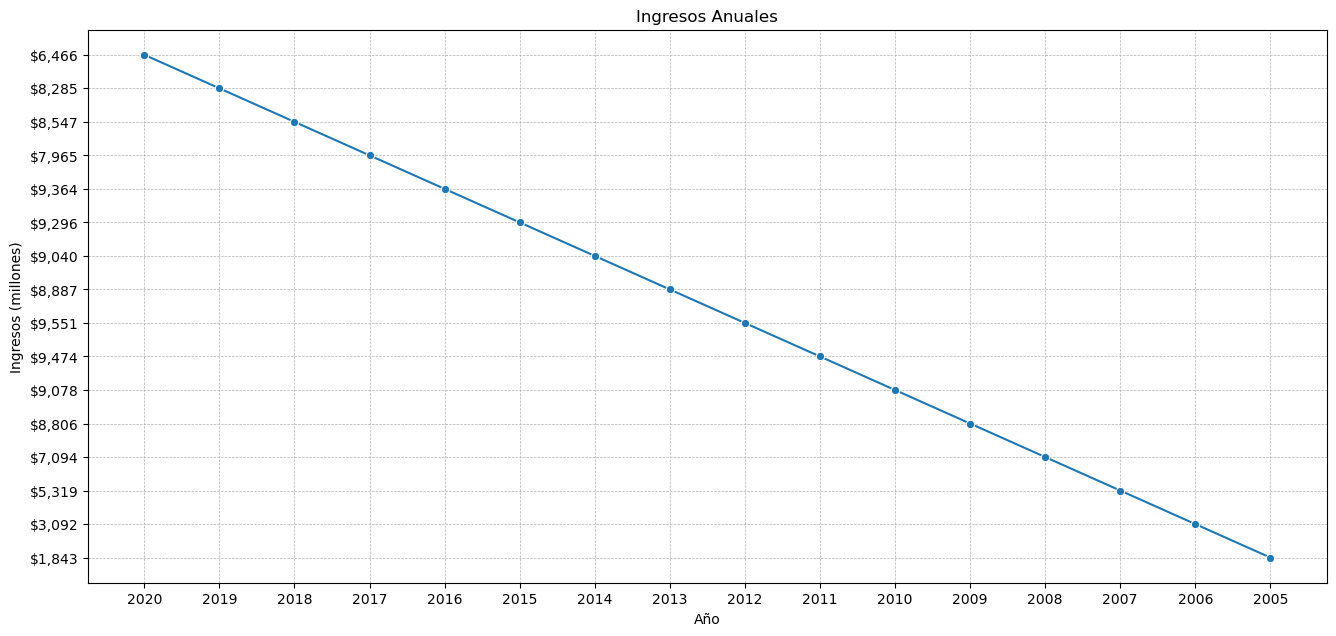

In [50]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(data=df_tesla, x='YEARS', y='REVENUE', marker='o', ax=ax)


# Título y etiquetas

plt.title('Ingresos Anuales')
plt.xlabel('Año')
plt.ylabel('Ingresos (millones)')
plt.tight_layout(pad=3.0)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
# Mostrar el gráfico
plt.show()

## Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

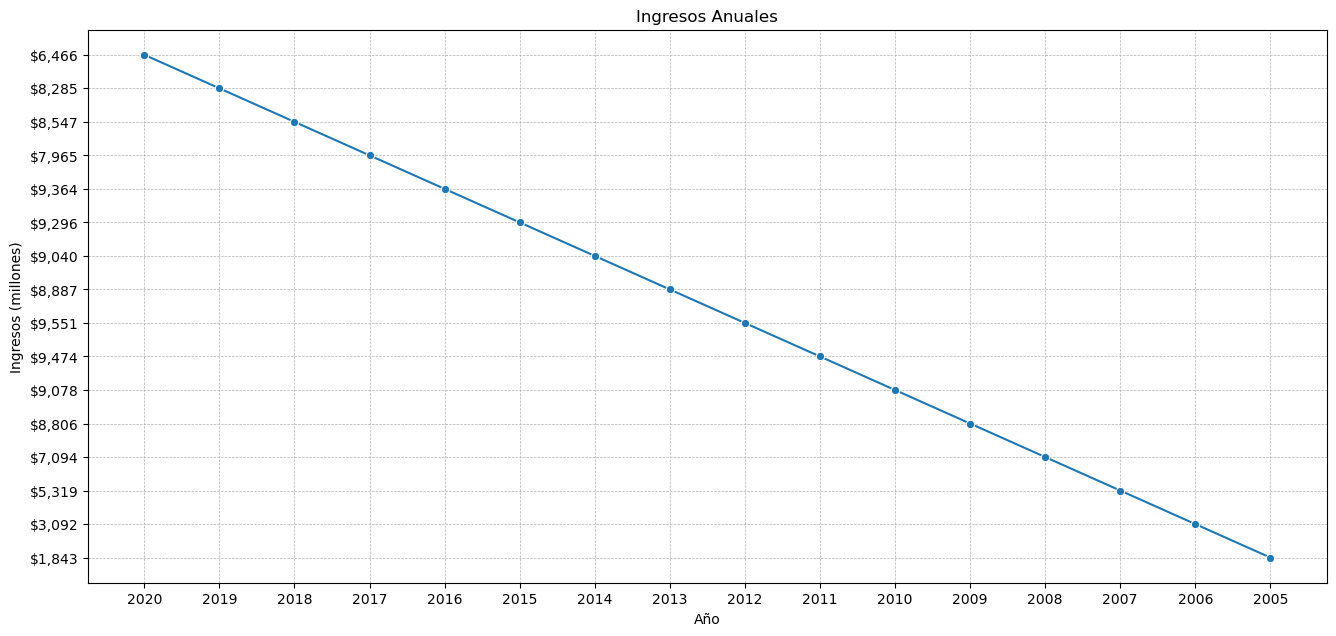

In [51]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(data=df_game, x='YEARS', y='REVENUE', marker='o', ax=ax)


# Título y etiquetas

plt.title('Ingresos Anuales')
plt.xlabel('Año')
plt.ylabel('Ingresos (millones)')
plt.tight_layout(pad=3.0)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
# Mostrar el gráfico
plt.show()